In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data=pd.read_csv("hour.csv")

In [53]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [55]:
data.shape

(17379, 17)

In [56]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [57]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [58]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [59]:
data=data.drop(data.columns[[0,1,3]],axis=1)

In [60]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
categorical_features=['season','mnth','hr','holiday','weekday','workingday','weathersit']

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

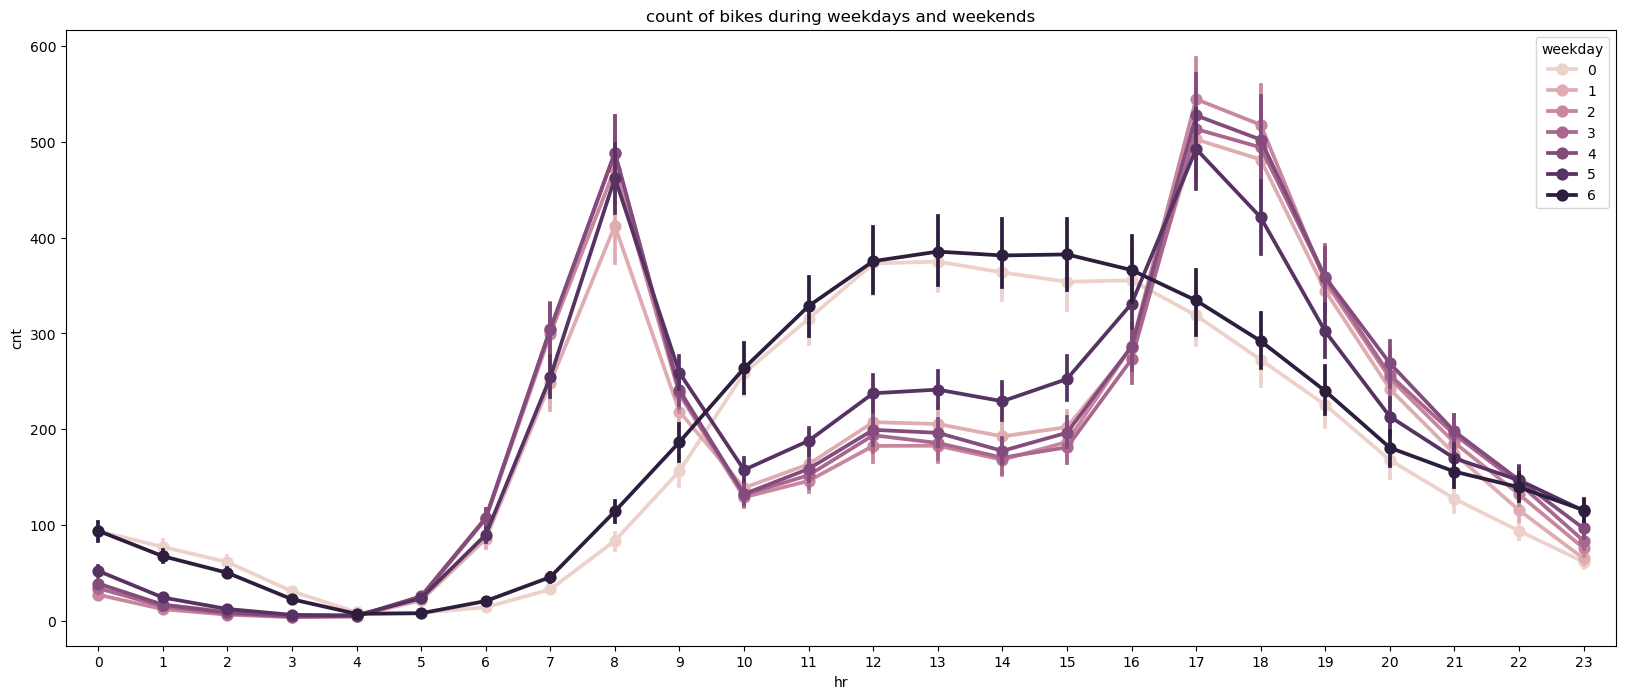

In [62]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='hr',y='cnt',hue='weekday',ax=ax)
ax.set(title="count of bikes during weekdays and weekends")

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

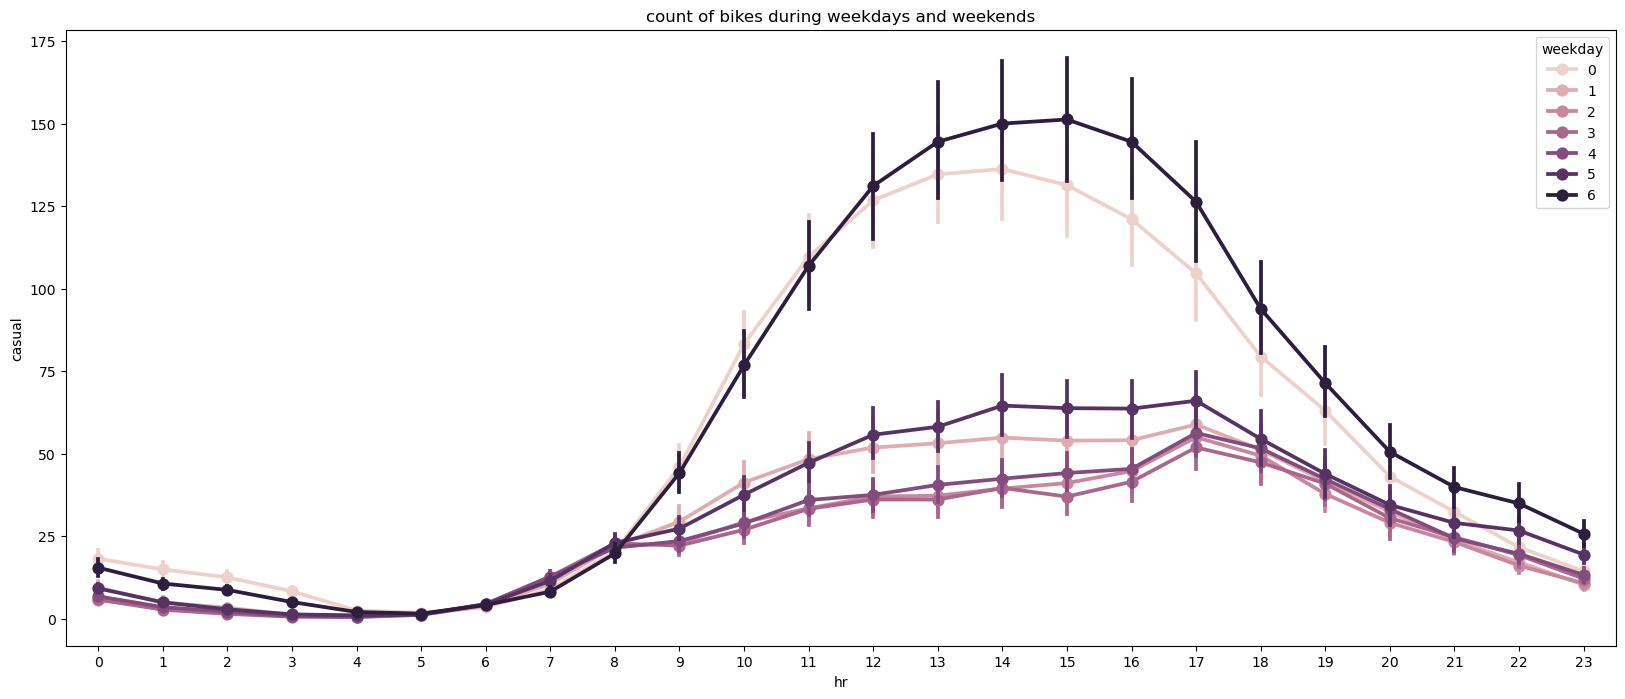

In [63]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='hr',y='casual',hue='weekday',ax=ax)
ax.set(title="count of bikes during weekdays and weekends")

In [64]:
data['weekday'].value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

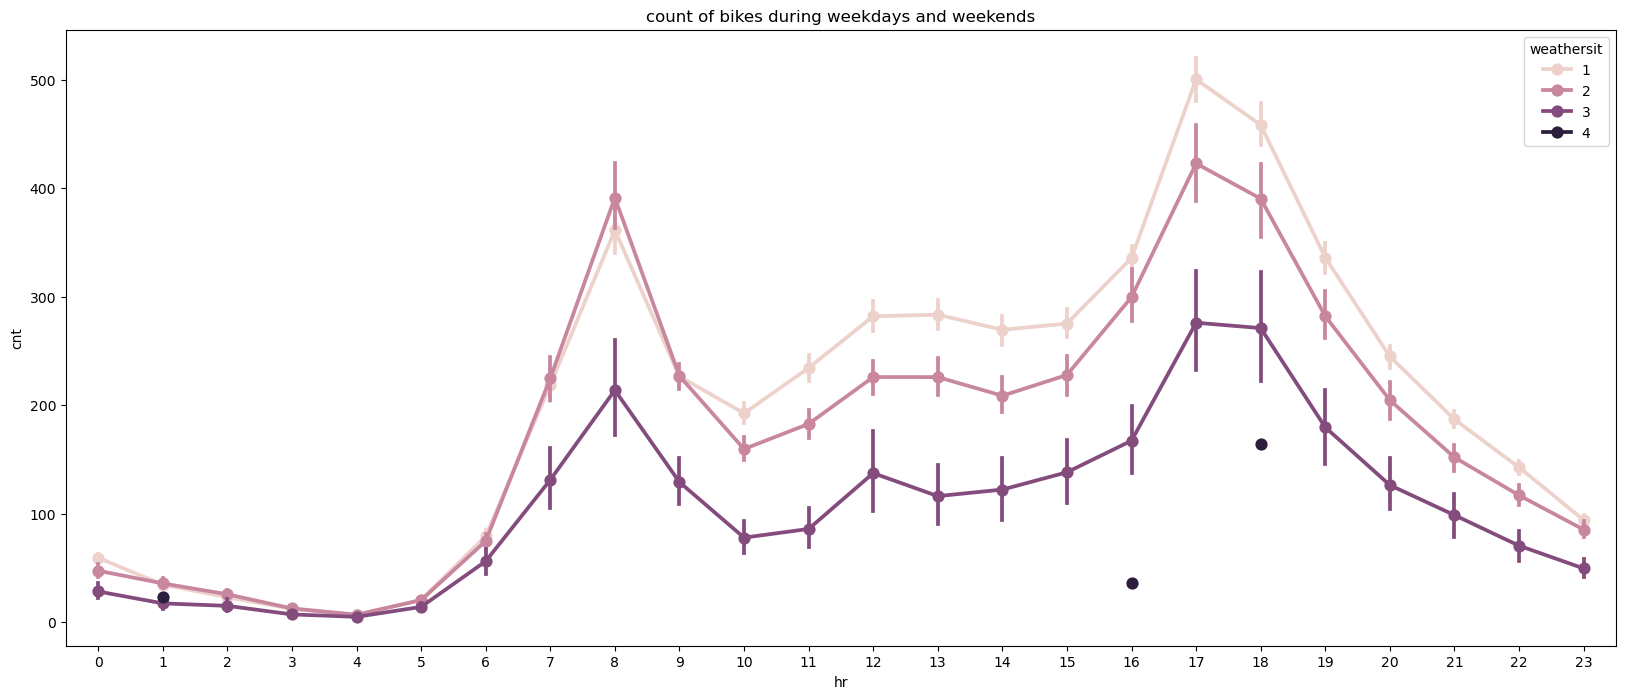

In [65]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='hr',y='cnt',hue='weathersit',ax=ax)
ax.set(title="count of bikes during weekdays and weekends")

In [66]:
data['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

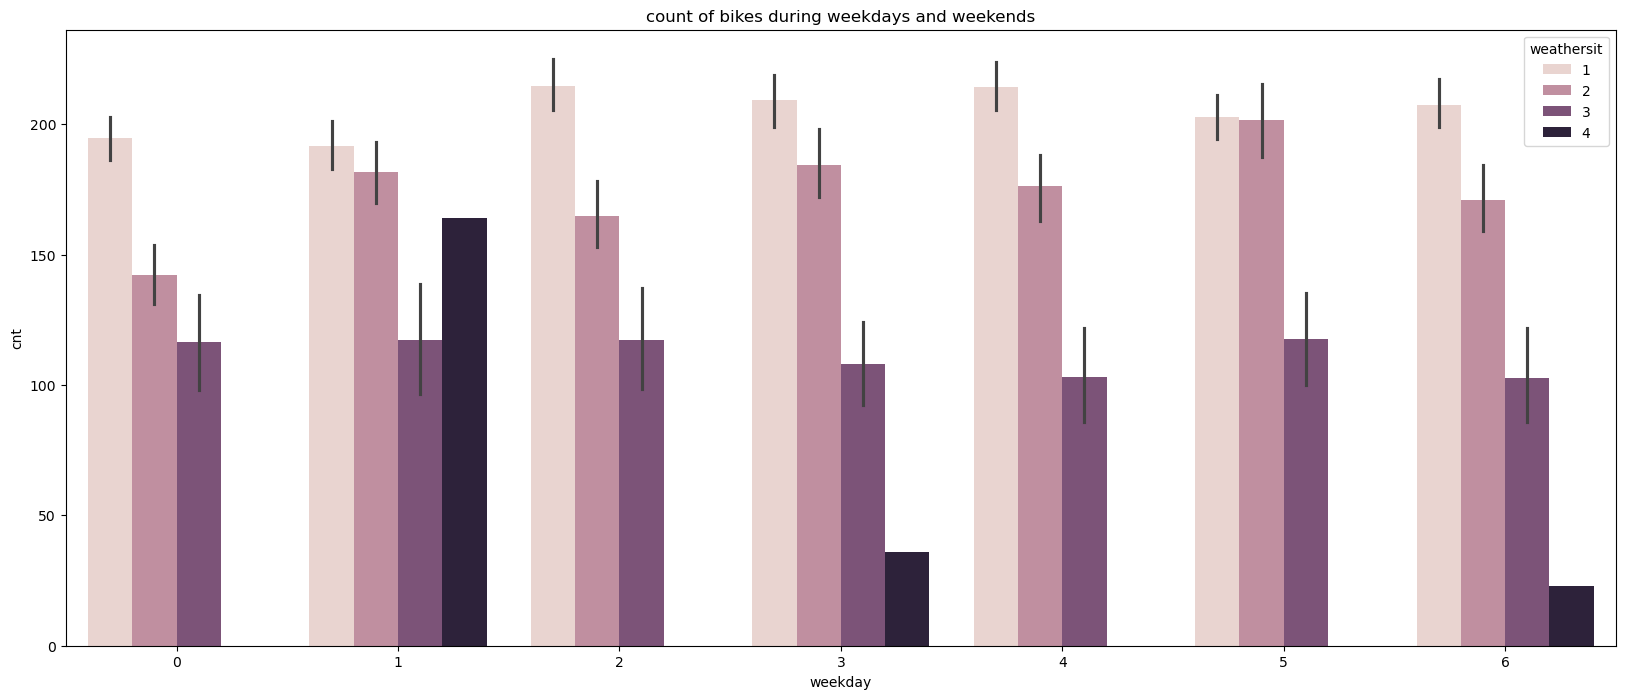

In [67]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='weekday',y='cnt',hue='weathersit',ax=ax)
ax.set(title="count of bikes during weekdays and weekends")

<Axes: >

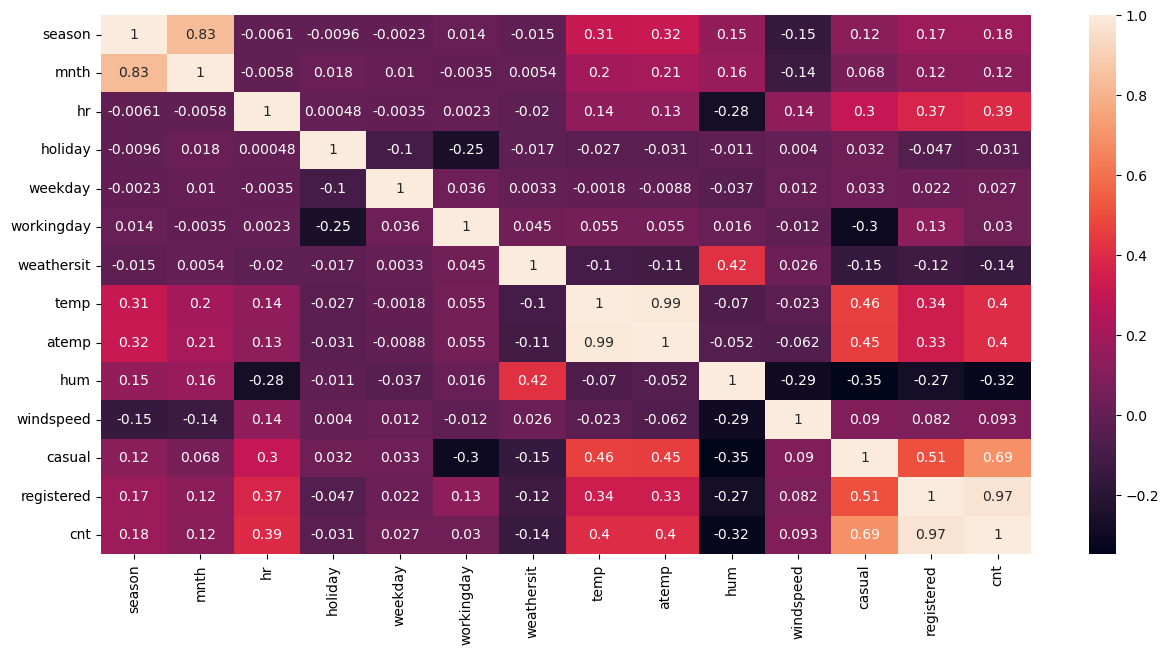

In [68]:
corr=data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

In [69]:
categorical_features=['season','mnth','hr','holiday','weekday','workingday']
df=pd.get_dummies(data,columns=categorical_features,drop_first=True)

In [71]:
df.head()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,...,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,1,0.24,0.2879,0.81,0.0,3,13,16,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.22,0.2727,0.80,0.0,8,32,40,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.22,0.2727,0.80,0.0,5,27,32,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.24,0.2879,0.75,0.0,3,10,13,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0.24,0.2879,0.75,0.0,0,1,1,False,False,...,False,False,False,False,False,False,False,False,True,False


In [72]:
df=df.drop('casual',axis=1) #dropping one of the higly so

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [79]:
X=df.drop('cnt',axis=1)
y=df['cnt']

In [81]:
X

,weathersit,temp,atemp,hum,windspeed,registered,season_2,season_3,season_4,mnth_2,...,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,1,0.24,0.2879,0.81,0.0000,13,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.22,0.2727,0.80,0.0000,32,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.22,0.2727,0.80,0.0000,27,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.24,0.2879,0.75,0.0000,10,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0.24,0.2879,0.75,0.0000,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2,0.26,0.2576,0.60,0.1642,108,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17375,2,0.26,0.2576,0.60,0.1642,81,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17376,1,0.26,0.2576,0.60,0.1642,83,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
17377,1,0.26,0.2727,0.56,0.1343,48,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True


In [82]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
X_train_scaled=scaler.fit_transform(X_train)

In [85]:
X_train_scaled

array([[0.        , 0.18367347, 0.197     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.51020408, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.44897959, 0.4545    , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.79591837, 0.7273    , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.2244898 , 0.197     , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.51020408, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [86]:
X_test_scaled=scaler.fit_transform(X_test)

In [87]:
X_test_scaled

array([[0.        , 0.82978723, 0.70317657, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.23404255, 0.21875   , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.31914894, 0.29682343, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.33333333, 0.19148936, 0.17182343, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.4893617 , 0.46875   , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.31914894, 0.3125    , ..., 0.        , 0.        ,
        1.        ]])

In [90]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [91]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [93]:
ypred=lr.predict(X_test_scaled)

In [95]:
import numpy as np
mse=np.sum(np.power(ypred-y_test,2))/len(ypred)

In [96]:
mse

818.3285500410268

In [97]:
lr.coef_

array([-7.45658064e+00,  6.60238708e+01,  3.39412916e+00, -1.96027957e+01,
       -1.32978840e+01,  1.01228473e+03,  5.23136521e+00, -3.16781716e+00,
       -8.68952804e+00, -2.49639222e+00,  6.33973787e+00,  4.65550708e+00,
        4.53103970e+00, -4.11490804e+00, -2.58061003e+00,  2.25502796e-01,
        5.61638171e+00,  1.30883869e+01,  8.94034987e+00,  1.49846281e+00,
        2.48387669e-01,  8.41959903e-01, -7.74331726e-01, -9.74251031e-01,
       -8.00475602e-01, -5.98662660e+00, -1.80139205e+01, -2.88694914e+01,
       -3.85940095e-02,  2.19913733e+01,  3.00772762e+01,  3.27788090e+01,
        3.57761326e+01,  3.70700489e+01,  3.59526411e+01,  2.67385097e+01,
        7.65145710e+00, -1.06200246e+00,  1.64192482e+00,  2.01577029e+00,
        1.51042494e+00,  1.58793299e+00,  6.35890293e-01, -4.42599712e+00,
       -5.60170113e+00, -9.36799541e+00, -1.00411350e+01, -9.63956102e+00,
       -1.23159033e+00,  4.62562098e+00, -3.14559858e+01])

In [98]:
ypred_train=lr.predict(X_train_scaled)

In [106]:
training_score=r2_score(ypred_train,y_train)*100

In [107]:
training_score

97.32579327595107

In [104]:
testing_score=r2_score(ypred,y_test)*100

In [105]:
testing_score

97.36308547065585